This notebook explores the raw datasets through its metadata in order to find the right the right patients to be preprocessed

In [1]:
import pandas as pd

In [2]:
clinical_data = pd.read_csv("./data/clinical_annotations.tsv", sep='\t')

In [74]:
new_clinical_data = pd.read_csv("./data/PDC_clinical_manifest_07042024_120812.csv")

Let's see the class counts from the clinical annotations

In [69]:
new_clinical_data["Tumor Grade"].value_counts()

Tumor Grade
G2              145
Not Reported    104
G3               40
G1               13
G4                1
Name: count, dtype: int64

In [5]:
new_clinical_data.loc[new_clinical_data["Tumor Grade"]=="G1"]["Cases Submitter ID"]

13     C3L-03632
61     C3L-00622
116    C3L-00599
118    C3N-02754
141    C3L-00928
164    C3L-00622
182    C3N-02971
190    C3L-03394
219    C3L-00599
230    C3N-02295
266    C3L-02604
269    C3L-03632
295    C3N-03190
Name: Cases Submitter ID, dtype: object

In [7]:
new_clinical_data["Tumor Grade"].value_counts()

Tumor Grade
G2              145
Not Reported    104
G3               40
G1               13
G4                1
Name: count, dtype: int64

In [3]:
clinical_data["tumor_grade"].value_counts()

tumor_grade
G2              614
G3              294
Not Reported    176
G1              151
GX               26
G4               26
'--              22
Unknown           4
High Grade        1
Name: count, dtype: int64

In [9]:
#Sample 57 patients from new_clinical annotations
g1_patients = new_clinical_data.loc[new_clinical_data["Tumor Grade"] == "G1"]["Cases Submitter ID"]
g2_patients = new_clinical_data.loc[new_clinical_data["Tumor Grade"] == "G2"]["Cases Submitter ID"]
g3_patients = new_clinical_data.loc[new_clinical_data["Tumor Grade"] == "G3"]["Cases Submitter ID"]


selected_g1_patients = g1_patients.sample(n=13, replace = False)
selected_g2_patients = g2_patients.sample(n=22, replace = False)
selected_g3_patients = g3_patients.sample(n=22, replace = False)


Here I try to match the patients for which I have segmentations available (reference patients) with the annotations

In [ ]:

reference_patients = pd.read_csv("data/Metadata_Report_CPTAC-PDA_2023_07_14.csv")
reference_patients = reference_patients[reference_patients["Annotation Type"]=="Segmentation"]["PatientID"]

#print(reference_patients)

g1_patients = set(clinical_data.loc[clinical_data["tumor_grade"] == "G1"]["case_submitter_id"])
print(len(reference_patients[reference_patients.isin(g1_patients)])) #Only 5 patients with clinical annotations with g1 cancer grade 
#selected_g1_patients = g1_patients[g1_patients.isin(reference_patients)].sample(n=5, replace = False)

g2_patients = set(clinical_data.loc[clinical_data["tumor_grade"] == "G2"]["case_submitter_id"])
print(len(reference_patients[reference_patients.isin(g2_patients)]))

#selected_g2_patients = g2_patients[g2_patients.isin(reference_patients)].sample(n=33, replace = False)

g3_patients = set(clinical_data.loc[clinical_data["tumor_grade"] == "G3"]["case_submitter_id"])
print(len(reference_patients[reference_patients.isin(g3_patients)]))

#selected_g3_patients = g3_patients[g3_patients.isin(reference_patients)].sample(n=19, replace = False)

16
135
43


In [12]:
#Sample 57 patients with balanced labels
#clinical_data = pd.read_csv("./data/CPTACPDAclinical.csv")
clinical_data = pd.read_csv("./data/clinical_annotations.tsv", sep='\t')
reference_patients = pd.read_csv("data/Metadata_Report_CPTAC-PDA_2023_07_14.csv")
reference_patients = set(reference_patients[reference_patients["Annotation Type"]=="Segmentation"]["PatientID"])

#print(reference_patients)

g1_patients = clinical_data.loc[clinical_data["tumor_grade"] == "G1"]["case_submitter_id"]
print(len(g1_patients[g1_patients.isin(reference_patients)])) #Only 5 patients with clinical annotations with g1 cancer grade 
g1_annotated = set(g1_patients) & reference_patients #intersection between reference patients and g1_patients
print(len(g1_annotated))
#selected_g1_patients = g1_patients[g1_patients.isin(reference_patients)].sample(n=5, replace = False)

g2_patients = clinical_data.loc[clinical_data["tumor_grade"] == "G2"]["case_submitter_id"]
print(len(g2_patients[g2_patients.isin(reference_patients)]))
g2_annotated = set(g2_patients) & reference_patients
print(len(g2_annotated))
#selected_g2_patients = g2_patients[g2_patients.isin(reference_patients)].sample(n=33, replace = False)

g3_patients = clinical_data.loc[clinical_data["tumor_grade"] == "G3"]["case_submitter_id"]
print(len(g3_patients[g3_patients.isin(reference_patients)]))
g3_annotated = set(g3_patients) & reference_patients
print(len(g3_annotated))
#selected_g3_patients = g3_patients[g3_patients.isin(reference_patients)].sample(n=19, replace = False)

5
5
47
47
19
19


Here I checked if whether combining clinical annotations from multiple sources would result in more patients

In [2]:
clinical_data_list = [
    pd.read_csv("./data/CPTACPDAclinicalSerumGlycoproteome.csv"), 
    pd.read_csv("./data/clinical_annotations.tsv", sep="\t").rename(columns={"tumor_grade":"Tumor Grade","case_submitter_id":"Case Submitter ID"}), 
    pd.read_csv("./data/CPTAC2clinical.tsv", sep="\t").rename(columns={"tumor_grade":"Tumor Grade","case_submitter_id":"Case Submitter ID"}),
    pd.read_csv("./data/CPTACPDAclinical.csv"), 
    pd.read_csv("./data/CPTACPDAclinicalDIAProteome.csv"), 
    pd.read_csv("./data/CPTACPDAclinicalBioTextProteome.csv"), 
    pd.read_csv("./data/CPTACPDAclinicalSerumProteome.csv")
    ]

#clinical_data = pd.read_csv("./data/CPTACUCEC_clinicalannotationsProteom.csv")
#clinical_data1 = pd.read_csv("./data/CPTACUCEC_clinicalIDC.csv")

reference_patients = pd.read_csv("data/Metadata_Report_CPTAC-PDA_2023_07_14.csv")
reference_patients = reference_patients[reference_patients["Annotation Type"]=="Segmentation"]["PatientID"]
#reference_patients_list = reference_patients.to_list()

#print(reference_patients)
g1_patients = []
for clinical_data in clinical_data_list:
    g1_patients.extend(clinical_data.loc[clinical_data["Tumor Grade"] == "G1"]["Case Submitter ID"].to_list()) 
g1_annotated = set(g1_patients) & set(reference_patients) #intersection between reference patients and g1_patients
g1_volumes = reference_patients.loc[reference_patients.isin(g1_patients)]
print(f"g1:{len(g1_annotated)}")
print(f"g1 volumes: {len(g1_volumes)}")
g2_patients = []
for clinical_data in clinical_data_list:
    g2_patients.extend(clinical_data.loc[clinical_data["Tumor Grade"] == "G2"]["Case Submitter ID"].to_list()) 
g2_annotated = set(g2_patients) & set(reference_patients) #intersection between reference patients and g1_patients
g2_volumes = reference_patients.loc[reference_patients.isin(g2_patients)]
print(f"g2:{len(g2_annotated)}")
print(f"g2 volumes: {len(g2_volumes)}")

g3_patients = []
for clinical_data in clinical_data_list:
    g3_patients.extend(clinical_data.loc[clinical_data["Tumor Grade"] == "G3"]["Case Submitter ID"].to_list()) 
g3_volumes = reference_patients.loc[reference_patients.isin(g3_patients)]
g3_annotated = set(g3_patients) & set(reference_patients) #intersection between reference patients and g1_patients
print(f"g3:{len(g3_annotated)}")
print(f"g2 volumes: {len(g3_volumes)}")


g1:5
g1 volumes: 16
g2:53
g2 volumes: 151
g3:19
g2 volumes: 43


In [ ]:
with open("data/sampled_patients.txt", "a") as file:
    file.write(',\n'.join(g1_annotated.astype(str))+',\n')
    file.write(',\n'.join(selected_g2_patients.astype(str))+',\n')
    file.write(',\n'.join(selected_g3_patients.astype(str))+',\n')

## CPTAC UCEC CT

Now I do the same for the CPTAC UCEC dataset

In [17]:
clinical_data = pd.read_csv("./data/CPTACUCEC_clinicalannotationsProteom.csv")

In [80]:
clinical_data["Tumor Grade"].value_counts()

Tumor Grade
G2              68
G1              40
G3              28
Not Reported    21
Unknown          1
High Grade       1
Name: count, dtype: int64

In [18]:
reference_patients = pd.read_csv("data/Metadata_Report_CPTAC-UCEC_2023_07_14.csv")
reference_patients = reference_patients[reference_patients["Annotation Type"]=="Segmentation"]["PatientID"]
#print(reference_patients)

g1_patients = set(clinical_data.loc[clinical_data["Tumor Grade"] == "G1"]["Case Submitter ID"])

print(len(reference_patients[reference_patients.isin(g1_patients)])) #Only 5 patients with clinical annotations with g1 cancer grade 
#selected_g1_patients = g1_patients[g1_patients.isin(reference_patients)].sample(n=5, replace = False)


g2_patients = set(clinical_data.loc[clinical_data["Tumor Grade"] == "G2"]["Case Submitter ID"])
print(len(reference_patients[reference_patients.isin(g2_patients)]))

#selected_g2_patients = g2_patients[g2_patients.isin(reference_patients)].sample(n=33, replace = False)

g3_patients = set(clinical_data.loc[clinical_data["Tumor Grade"] == "G3"]["Case Submitter ID"])
print(len(reference_patients[reference_patients.isin(g3_patients)]))

#selected_g3_patients = g3_patients[g3_patients.isin(reference_patients)].sample(n=19, replace = False)


11
36
24


In [19]:
reference_patients = pd.read_csv("data/Metadata_Report_CPTAC-UCEC_2023_07_14.csv")
reference_patients = reference_patients[reference_patients["Annotation Type"]=="Segmentation"]["PatientID"]
#print(reference_patients)

g1_patients = clinical_data.loc[clinical_data["Tumor Grade"] == "G1"]["Case Submitter ID"]

print(len(g1_patients[g1_patients.isin(reference_patients)])) #Only 5 patients with clinical annotations with g1 cancer grade 
#selected_g1_patients = g1_patients[g1_patients.isin(reference_patients)].sample(n=5, replace = False)


g2_patients = clinical_data.loc[clinical_data["Tumor Grade"] == "G2"]["Case Submitter ID"]
print(len(g2_patients[g2_patients.isin(reference_patients)]))

#selected_g2_patients = g2_patients[g2_patients.isin(reference_patients)].sample(n=33, replace = False)

g3_patients = clinical_data.loc[clinical_data["Tumor Grade"] == "G3"]["Case Submitter ID"]
print(len(g3_patients[g3_patients.isin(reference_patients)]))

#selected_g3_patients = g3_patients[g3_patients.isin(reference_patients)].sample(n=19, replace = False)


4
10
8


Combining multiple clinical annotations results in a good amount of patients

In [3]:
clinical_data_list = [
    pd.read_csv("./data/CPTACUCEC_clinicalannotationsProteom.csv"),
    pd.read_csv("./data/CPTACUCEC_clinicalIDC.csv"),
    pd.read_csv("./data/CPTACUCEC_clinicalConfirmatoryGlyco.csv"),
    pd.read_csv("./data/CPTACUCEC_clinicalConfirmatoryProteome.csv"),
    pd.read_csv("./data/CPTACUCEC_clinicalannotations.csv"),
    pd.read_csv("./data/CPTACUCEC_clinicalannotationsAcetylome.csv"),
    pd.read_csv("./data/CPTACUCEC_clinicalannotationsPhosphoproteom.csv")
    ]

clinical_data = pd.read_csv("./data/CPTACUCEC_clinicalannotationsProteom.csv")
clinical_data1 = pd.read_csv("./data/CPTACUCEC_clinicalIDC.csv")

reference_patients = pd.read_csv("data/Metadata_Report_CPTAC-UCEC_2023_07_14.csv")
reference_patients = reference_patients[reference_patients["Annotation Type"]=="Segmentation"]["PatientID"]
reference_patients_list = reference_patients.to_list()

#print(reference_patients)
g1_patients = []
for clinical_data in clinical_data_list:
    g1_patients.extend(clinical_data.loc[clinical_data["Tumor Grade"] == "G1"]["Case Submitter ID"].to_list()) 
g1_annotated = set(g1_patients) & set(reference_patients) #intersection between reference patients and g1_patients
g1_volumes = reference_patients.loc[reference_patients.isin(g1_patients)]
print(f"g1:{len(g1_annotated)}")
print(f"g1 volumes: {len(g1_volumes)}")
g2_patients = []
for clinical_data in clinical_data_list:
    g2_patients.extend(clinical_data.loc[clinical_data["Tumor Grade"] == "G2"]["Case Submitter ID"].to_list()) 
g2_annotated = set(g2_patients) & set(reference_patients) #intersection between reference patients and g1_patients
g2_volumes = reference_patients.loc[reference_patients.isin(g2_patients)]
print(f"g2:{len(g2_annotated)}")
print(f"g2 volumes: {len(g2_volumes)}")

g3_patients = []
for clinical_data in clinical_data_list:
    g3_patients.extend(clinical_data.loc[clinical_data["Tumor Grade"] == "G3"]["Case Submitter ID"].to_list()) 
g3_volumes = reference_patients.loc[reference_patients.isin(g3_patients)]
g3_annotated = set(g3_patients) & set(reference_patients) #intersection between reference patients and g1_patients
print(f"g3:{len(g3_annotated)}")
print(f"g2 volumes: {len(g3_volumes)}")
print("----------------------------------------")
print("Sampled patients:")
patients = g1_annotated.union( g2_annotated).union( g3_annotated)
print(',\n'.join(patients))


g1:15
g1 volumes: 44
g2:36
g2 volumes: 169
g3:18
g2 volumes: 81
----------------------------------------
Sampled patients:
C3N-02947,
C3N-00866,
C3N-00729,
C3N-02631,
C3N-01878,
C3L-02399,
C3N-00520,
C3N-02979,
C3L-00947,
C3N-01001,
C3N-01877,
C3N-01219,
C3N-01346,
C3N-01761,
C3L-00963,
C3N-01875,
C3N-02595,
C3L-01732,
C3N-01802,
C3N-01765,
C3L-00770,
C3L-01248,
C3N-02789,
C3N-00858,
C3N-01344,
C3N-01871,
C3L-00938,
C3L-01247,
C3N-01879,
C3N-01349,
C3L-00771,
C3N-01172,
C3N-01171,
C3N-01876,
C3N-02012,
C3N-02639,
C3N-02678,
C3N-02637,
C3L-01744,
C3L-01246,
C3N-01003,
C3L-02403,
C3N-03767,
C3N-02632,
C3N-01764,
C3N-01843,
C3N-02635,
C3N-00734,
C3N-02598,
C3N-01873,
C3N-02274,
C3N-02978,
C3L-01277,
C3N-01008,
C3N-01880,
C3N-01510,
C3N-01874,
C3N-02298,
C3N-01342,
C3N-01007,
C3N-00743,
C3L-00961,
C3N-03417,
C3N-03005,
C3N-00732,
C3N-00860,
C3N-00872,
C3N-02976,
C3N-01341


Here I list the patient ids per class in order to create the splits in a way that resembles the data distribution

In [7]:
print("G1:")
print('\n'.join(g1_annotated))
print("--------------------------------------------------")
print("G2:")
print('\n'.join(g2_annotated))
print("--------------------------------------------------")
print("G3:")
print('\n'.join(g3_annotated))
print("--------------------------------------------------")


G1:
C3N-00860
C3N-02678
C3N-00866
C3L-01248
C3N-01874
C3N-02298
C3N-00872
C3N-00520
C3N-01879
C3L-00961
C3N-03417
C3N-00734
C3N-00732
C3L-02399
C3N-01875
--------------------------------------------------
G2:
C3N-02947
C3N-00729
C3L-00947
C3N-01877
C3N-03005
C3L-01732
C3N-01765
C3L-00770
C3N-02789
C3N-00858
C3N-01871
C3L-00938
C3L-00771
C3N-01172
C3N-01171
C3N-01876
C3N-02012
C3N-02637
C3L-01744
C3L-02403
C3N-02632
C3N-01843
C3N-02598
C3N-01873
C3N-02274
C3N-02978
C3N-01008
C3N-01880
C3N-01510
C3N-01342
C3N-01007
C3N-00743
C3N-01344
C3N-01878
C3N-01001
C3N-01341
--------------------------------------------------
G3:
C3L-01246
C3N-01003
C3N-02631
C3N-02976
C3N-03767
C3L-01247
C3N-02979
C3N-01764
C3N-01349
C3N-01219
C3N-01346
C3N-01761
C3L-00963
C3N-02635
C3N-02595
C3N-02639
C3L-01277
C3N-01802
--------------------------------------------------


#### Experiments with the cptac library

In [40]:
import cptac

In [58]:
en = cptac.Ucec()
en.list_data_sources()

,Data type,Available sources
0,CNV,"[bcm, washu]"
1,circular_RNA,[bcm]
2,miRNA,"[bcm, washu]"
3,phosphoproteomics,"[bcm, umich]"
4,proteomics,"[bcm, umich]"
5,transcriptomics,"[bcm, broad, washu]"
6,ancestry_prediction,[harmonized]
7,somatic_mutation,"[harmonized, washu]"
8,clinical,[mssm]
9,follow-up,[mssm]


In [ ]:
clinical = en.get_CNV("washu")
clinical.head()

In [56]:
for col in clinical.columns:
    print(col)

height_at_time_of_surgery_cm
weight_at_time_of_surgery_kg
bmi
history_of_cancer
alcohol_consumption
tobacco_smoking_history
age_at_which_the_participant_started_smoking
age_at_which_the_participant_stopped_smoking
on_the_days_participant_smoked_how_many_cigarettes_did_he_she_usually_smoke
number_of_pack_years_smoked
was_the_participant_exposed_to_secondhand_smoke
exposure_to_secondhand_smoke_in_household_during_participants_childhood
exposure_to_secondhand_smoke_in_participants_current_household
number_of_years_participant_has_consumed_more_than_2_drinks_per_day_for_men_and_more_than_1_drink_per_day_for_women
medical_condition
history_of_treatment
history_source


In [42]:
clinical["tumor_stage_pathological"].value_counts()

tumor_stage_pathological
Stage I      76
Stage III    15
Stage II      9
Stage IV      3
Name: count, dtype: int64

In [46]:
clinical_data = clinical

In [51]:
clinical.head()

Name,tumor_code,discovery_study,type_of_analyzed_samples,confirmatory_study,type_of_analyzed_samples,age,sex,race,ethnicity,ethnicity_race_ancestry_identified,...,additional_treatment_pharmaceutical_therapy_for_new_tumor,additional_treatment_immuno_for_new_tumor,number_of_days_from_date_of_initial_pathologic_diagnosis_to_date_of_additional_surgery_for_new_tumor_event_loco-regional,number_of_days_from_date_of_initial_pathologic_diagnosis_to_date_of_additional_surgery_for_new_tumor_event_metastasis,"Recurrence-free survival, days","Recurrence-free survival from collection, days","Recurrence status (1, yes; 0, no)","Overall survival, days","Overall survival from collection, days","Survival status (1, dead; 0, alive)"
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,UCEC,Yes,Tumor_and_Normal,NaN,NaN,64,Female,White,Not Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,NaN,NaN,0,737.0,737.0,0.0
C3L-00008,UCEC,Yes,Tumor,NaN,NaN,58,Female,White,Not Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,NaN,NaN,0,898.0,898.0,0.0
C3L-00032,UCEC,Yes,Tumor,NaN,NaN,50,Female,White,Not Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1710.0,1710.0,0.0
C3L-00084,UCEC,Yes,Tumor,NaN,NaN,74,Female,White,Not Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,NaN,NaN,0,335.0,335.0,0.0
C3L-00090,UCEC,Yes,Tumor,NaN,NaN,75,Female,White,Not Hispanic or Latino,White,...,Yes,No,NaN,NaN,50.0,56.0,1,1281.0,1287.0,1.0


In [52]:
reference_patients = set(pd.read_csv("data/Metadata_Report_CPTAC-UCEC_2023_07_14.csv")["PatientID"])

#print(reference_patients)

g1_patients = clinical_data.loc[clinical_data["tumor_stage_pathological"] == "Stage I "].index

print(len(g1_patients[g1_patients.isin(reference_patients)])) #Only 5 patients with clinical annotations with g1 cancer grade 
#selected_g1_patients = g1_patients[g1_patients.isin(reference_patients)].sample(n=5, replace = False)


g2_patients = clinical_data.loc[clinical_data["tumor_stage_pathological"] == "Stage II"].index
print(len(g2_patients[g2_patients.isin(reference_patients)]))

#selected_g2_patients = g2_patients[g2_patients.isin(reference_patients)].sample(n=33, replace = False)

g3_patients = clinical_data.loc[clinical_data["tumor_stage_pathological"] == "Stage III"].index
print(len(g3_patients[g3_patients.isin(reference_patients)]))

#selected_g3_patients = g3_patients[g3_patients.isin(reference_patients)].sample(n=19, replace = False)


0
3
6


## Checks on preprocessed data

In [20]:
from pathlib import Path
import os
from_dir = os.listdir("./data/processed/CT")
print(len(from_dir))
print(len(set(from_dir)))

all = Path("./data/processed/all.txt").read_text().splitlines()

rest = set(from_dir) - set(all)

55
55


Here I check what's the maximul length as well as checks for empty volumes of the preprocessed volumes in order to then apply a preprocessing with fixed depth, for DeepLearning downstream tasks

In [5]:
import os
import numpy as np
root_path = "./data/processed_CPTACUCEC_3D_pad/CT"
subfolders = [f.path for f in os.scandir(root_path) if f.is_dir()] #Get patients folders
empty_count = 0
empty_patients = []
max_length = 0
for subfolder in subfolders:
    patient_id = subfolder.split('/')[-1]
    volumes = [f.path for f in os.scandir(subfolder) ]
    for volume in volumes:
        length = len(np.load(volume))
        if length == 0:
            print(f"!Warning! empty volume! patient_id:{patient_id}")
        #print(f"{patient_id}, volume length: {length}")
        if length != 131:
            print(f"length: {length}\n patient_id:{patient_id}") 
        if  length > max_length:
            max_length = length
            
print(max_length)


131


In [ ]:
import os
import numpy as np
root_path = "./data/processed_CPTACUCEC_3D_HR/CT"
subfolders = [f.path for f in os.scandir(root_path) if f.is_dir()] #Get patients folders
empty_count = 0
empty_patients = []
max_length = 0
for subfolder in subfolders:
    patient_id = subfolder.split('/')[-1]
    volumes = [f.path for f in os.scandir(subfolder) ]
    for volume in volumes:
        length = len(np.load(volume))
        if length == 0:
            print(f"!Warning! empty volume! patient_id:{patient_id}")
        #print(f"{patient_id}, volume length: {length}")
        if length != 131:
            print(f"length: {length}\n patient_id:{patient_id}") 
        if  length > max_length:
            max_length = length
print(max_length)


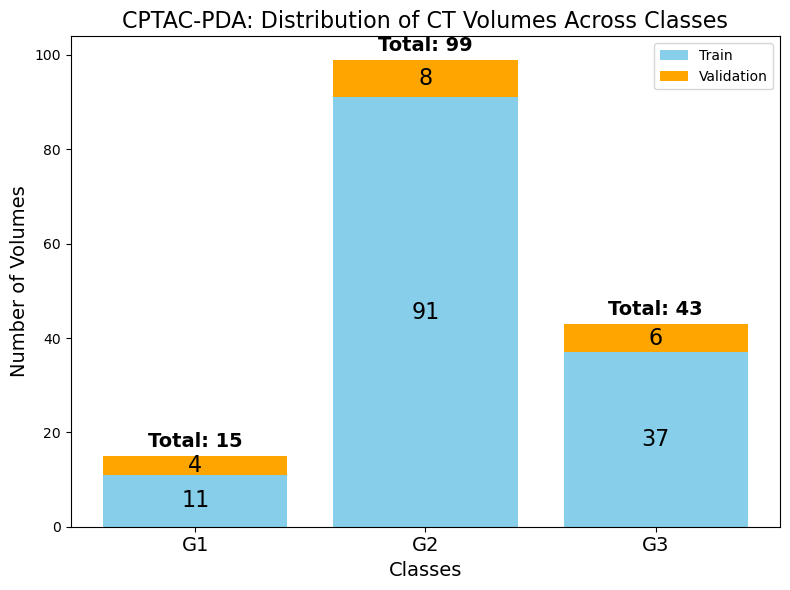

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classes = ['G1', 'G2', 'G3']
train_volumes = [11, 91, 37]
val_volumes = [4, 8, 6]

# Bar positions
x = np.arange(len(classes))

# Plot configuration
fig, ax = plt.subplots(figsize=(8, 6))

# Stacked bars
bars_train = ax.bar(x, train_volumes, label='Train', color='skyblue')
bars_val = ax.bar(x, val_volumes, bottom=train_volumes, label='Validation', color='orange')

# Add labels and title
ax.set_xlabel('Classes', fontsize=14)
ax.set_ylabel('Number of Volumes', fontsize=14)
ax.set_title('CPTAC-PDA: Distribution of CT Volumes Across Classes', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classes, fontsize=14)
ax.legend()

# Annotate values on bars
for i in range(len(x)):
    # Annotate train
    ax.text(x[i], train_volumes[i] / 2, str(train_volumes[i]), ha='center', va='center', color='black', fontsize=16)
    # Annotate validation
    ax.text(x[i], train_volumes[i] + val_volumes[i] / 2, str(val_volumes[i]), ha='center', va='center', color='black', fontsize=16)

# Annotate total volumes
for i, total in enumerate(np.array(train_volumes) + np.array(val_volumes)):
    ax.text(x[i], total + 1, f"Total: {total}", ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classes = ['G1', 'G2', 'G3']
train_volumes = [29, 138, 56]
val_volumes = [14, 24, 14]

# Bar positions
x = np.arange(len(classes))

# Plot configuration
fig, ax = plt.subplots(figsize=(8, 6))

# Stacked bars
bars_train = ax.bar(x, train_volumes, label='Train', color='skyblue')
bars_val = ax.bar(x, val_volumes, bottom=train_volumes, label='Validation', color='orange')

# Add labels and title
ax.set_xlabel('Classes', fontsize=14)
ax.set_ylabel('Number of Volumes', fontsize=14)
ax.set_title('CPTAC-UCEC: Distribution of CT Volumes Across Classes', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classes, fontsize=14)
ax.legend()

# Annotate values on bars
for i in range(len(x)):
    # Annotate train
    ax.text(x[i], train_volumes[i] / 2, str(train_volumes[i]), ha='center', va='center', color='black', fontsize=16)
    # Annotate validation
    ax.text(x[i], train_volumes[i] + val_volumes[i] / 2, str(val_volumes[i]), ha='center', va='center', color='black', fontsize=16)

# Annotate total volumes
for i, total in enumerate(np.array(train_volumes) + np.array(val_volumes)):
    ax.text(x[i], total + 1, f"Total: {total}", ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
